# Probability Density Functions

### Continous Uniform Distribution

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Generating the distribution -> np.random.uniform(inferior limit, superior limit, number of values)
data = np.random.uniform(1, 100, 1000000)

(array([ 99805., 100283., 100255.,  99873.,  99878.,  99856., 100204.,
         99858., 100300.,  99688.]),
 array([ 1.00001288, 10.8999898 , 20.79996672, 30.69994363, 40.59992055,
        50.49989747, 60.39987439, 70.29985131, 80.19982823, 90.09980514,
        99.99978206]),
 <BarContainer object of 10 artists>)

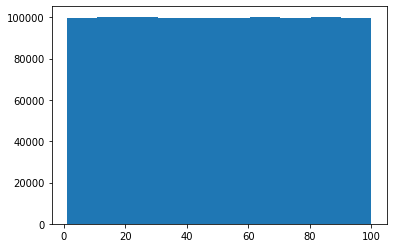

In [13]:
%matplotlib inline
plt.hist(data)

It's not exactly perfect, because it's generating random numbers, but it is very close to be uniform and it's enough for our purpose.

### Normal Distribution (The most common)

In [5]:
# Generating the distribution -> np.random.randn(number of values)
data = np.random.randn(100000)

(array([   65.,   765.,  4899., 16651., 30321., 28715., 14193.,  3796.,
          547.,    48.]),
 array([-4.06700834, -3.23999677, -2.4129852 , -1.58597363, -0.75896206,
         0.0680495 ,  0.89506107,  1.72207264,  2.54908421,  3.37609578,
         4.20310735]),
 <BarContainer object of 10 artists>)

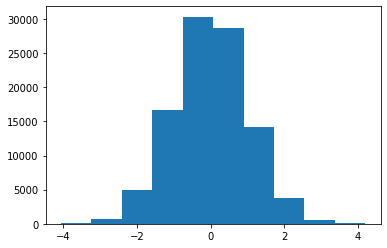

In [6]:
# Plotting the data:
%matplotlib inline
plt.hist(data)

It's not exactly perfect, because it's generating random numbers, but it is very close to a normal distribution and it's enough for our purpose.

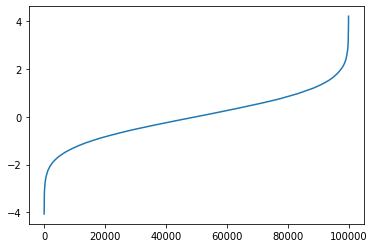

In [7]:
# Plotting the Cumulative Distribution Function (CDF) shape:
x = range(1, 100001)
plt.plot(x, sorted(data))

There are cases in which the normal distribution's mean is not zero, so it's not normalized.

So we are going to create different normal distributions.

(array([  13.,  108.,  544., 1468., 2626., 2726., 1735.,  616.,  144.,
          20.]),
 array([-3.07670628, -1.38940992,  0.29788643,  1.98518279,  3.67247915,
         5.3597755 ,  7.04707186,  8.73436822, 10.42166458, 12.10896093,
        13.79625729]),
 <BarContainer object of 10 artists>)

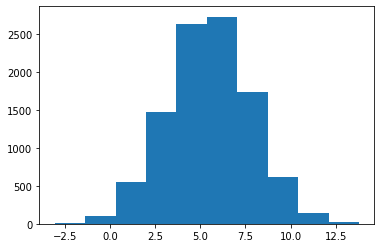

In [8]:
# For this purpose, you should input the mean and the std depending on the distribution's features:
mean = 5.5
std = 2.3
# z = (x - mean) / std -> Central Limit Theorem - N(0, 1)
data = mean + std*np.random.randn(10000) # To convert: x = mean + std * z -> N(mean, std)
plt.hist(data)

As you can see, it has the same shape as the previous one, but the mean and the standard deviation are differente (values defined arbitrarily).

# Monte Carlo Simulation

It is a real experiment to calculate the PI value by a sample of random numbers.

For it, we'll consider a known R radius circle circumscribed in a square of measure 2R:

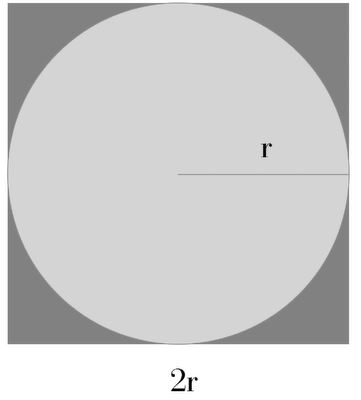

So we'll calculate the probability of picking up a random point inside the circle (π/4).

### The experiment algorithm:

* Generate 2 random numbers between 0 and 1 (x and y) multiple times (in the example 10000 times);

* Calculate x² + y²;

    * If the value is smaller than 1, the point is inside the circle;

    * If the value is greater than 1, the point is outside the circle;

    * If the value is equal to 1, the point is in the cirle line;

* Calculate the total number of occurrences in which the point is inside the circle;

* Divide by the total number of occurrences in which the point is outside the circle;

* This way, it'll be obtained the probability of a random point is inside the circle (π/4);

* Use the probability calculated to round the π value;

* Repeat the algorithm multiple times (in the example 100 times) to obtain different rounds of π value;

* Calculate the mean of 1000 previous experiment to get a final result.

3.142975999999999


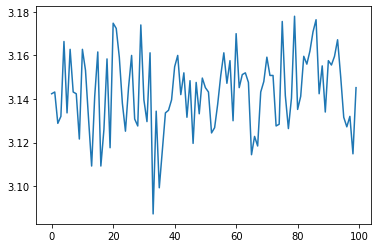

In [38]:
pi_avg = 0
n = 10000
n_exp = 100
pi_value_list = []
for i in range(n_exp):
    value = 0
    x = np.random.uniform(0, 1, n).tolist()
    y = np.random.uniform(0, 1, n).tolist()
    for j in range(n):
        z = (x[j]*x[j] + y[j]*y[j])
        if z <= 1:
            value += 1
            
    float_value = float(value)
    pi_value = float_value * 4 / n
    pi_value_list.append(pi_value)
    pi_avg += pi_value
    
pi = pi_avg/n_exp

print(pi)

plt.plot(pi_value_list)

(array([ 1.,  1.,  3.,  7., 18., 15., 19., 18., 10.,  8.]),
 array([3.0872 , 3.09628, 3.10536, 3.11444, 3.12352, 3.1326 , 3.14168,
        3.15076, 3.15984, 3.16892, 3.178  ]),
 <BarContainer object of 10 artists>)

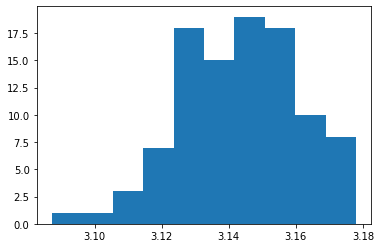

In [39]:
plt.hist(pi_value_list)

In [40]:
def pi_MonteCarlo(n, n_exp):
    pi_avg = 0
    n = 10000
    n_exp = 100
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0, 1, n).tolist()
        y = np.random.uniform(0, 1, n).tolist()
        for j in range(n):
            z = (x[j]*x[j] + y[j]*y[j])
            if z <= 1:
                value += 1
            
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value
    
    pi = pi_avg/n_exp
    
    print(pi)
    
    fig = plt.plot(pi_value_list)
    
    return (pi, fig)

3.1397199999999996


(3.1397199999999996, [<matplotlib.lines.Line2D at 0x1cb2421c3d0>])

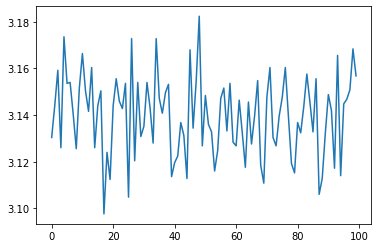

In [43]:
pi_MonteCarlo(1000, 200)